In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import r2_score
from tqdm import tqdm, trange
from pprint import pprint, pformat
import os
import matplotlib.pyplot as plt
import pdb

In [2]:
save_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v12_TITAN/K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0/"

In [3]:
dataset_y = np.load(os.path.join(save_dir, "all_y.npy"), allow_pickle=True)[()]
dataset_pred = np.load(os.path.join(save_dir, "all_yhat.npy"), allow_pickle=True)[()]

optim_val_pred = np.load(os.path.join(save_dir, "all_predicted_exps_optim_val_set.npy"), allow_pickle=True)[()]

prefinal_pred = np.load(os.path.join(save_dir, "prefinal_sequences_predicted_exps.npy"), allow_pickle=True)[()]
prefinal_filter_out = np.load(os.path.join(save_dir, "prefinal_sequences_filter_out.npy"), allow_pickle=True)

prefinal_seqs = np.load(os.path.join(save_dir, "prefinal_sequences.npy"), allow_pickle=True)
prefinal_seqs = np.argmax(prefinal_seqs, axis=-1)
prefinal_seqs = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(prefinal_seqs)
prefinal_seqs = ["".join(i) for i in prefinal_seqs]

final_pred = np.load(os.path.join(save_dir, "final_sequences_predicted_exps.npy"), allow_pickle=True)
final_seqs = np.load(os.path.join(save_dir, "final_sequences.npy"), allow_pickle=True)
final_seqs = np.argmax(final_seqs, axis=-1)
final_seqs = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_seqs)
final_seqs = ["".join(i) for i in final_seqs]

In [4]:
df = pd.DataFrame()
df["sequence"] = prefinal_seqs
for cell in prefinal_pred:
    df[cell] = prefinal_pred[cell]
df["filter_out"] = prefinal_filter_out

In [5]:
df

,sequence,THP1,Jurkat,K562,filter_out
0,TCTTCTCCCAGATCCCCCCAGTTCTTTTCTTTCTCTCTTCTTCCTT...,0.429271,0.247017,1.683841,True
1,TTTTTTTTTCTCTTATCTCTATATATCTCTTATCTCCATATCTCAT...,0.445513,0.511059,1.675051,True
2,AAAAAAAAAAAAAAAAAAAAACAAAAACCAATCCAAACAAACACAA...,1.207180,1.991466,1.644435,True
3,TTTTTCTTTTCTCTTTTTTTTATCCTTATCTCTTATATATATCTCT...,0.449007,0.531461,1.824820,False
4,TTTTTTCTTTCTCTCTTTCTTCTTATCTCCTCTTATATCTCTACAC...,0.451075,0.667071,1.691134,True
...,...,...,...,...,...
499995,TTTTTTTCGGACCCCTAGACAAGCCCCAACACAGCCCCCAGCCCCA...,0.266865,0.282952,1.535340,True
499996,AAAAAAAAAAAAAAAAAAAAAAGGAACAAACACAACCAATGCAAAC...,1.408131,2.128770,1.503429,True
499997,AAAACCCAAGAAAGGCCCTTGGACAGGCCCGGACAAAACACAACCA...,1.692341,2.277033,1.551256,True
499998,AAAAAAAAAAAAAAAAAAAAAGGCAAAGCAAAAGGAAAAGCAACAA...,1.292402,1.789238,1.665028,True


In [9]:
cells = ["THP1", "Jurkat", "K562"]
final_df = pd.DataFrame()
final_df["sequence"] = final_seqs
for i, cell in enumerate(cells):
    final_df[cell] = final_pred[:, i]
final_df

,sequence,THP1,Jurkat,K562
0,TTTTTCTTTTCTCTTTTTTTTATCCTTATCTCTTATATATATCTCT...,0.449007,0.531461,1.824820
1,AAAAAAAAAAAAAAAAAAAAAACAAAACAACAACCAAACAAAAAAC...,1.116162,1.328113,1.505903
2,TTTTTCTCTATATCTCTTCCATACAACCCCCTAGACAGCCCCTTGG...,0.622593,0.527900,1.698404
3,AAAAAAAAAAAAAAAAAAAAACACAAACCAAAACAAAAACAAAAGC...,1.183899,1.360627,1.457719
4,AAAAAAAAAAAAAAAAAAAAAAACAAAACAAGCAACCAATCCTTGG...,1.222696,1.612649,1.659533
...,...,...,...,...
49007,AGCCCCTTGGACAGCCCCTTGGACAGCCCCCAGGACAACCCCCAGG...,0.560820,0.633210,1.689165
49008,TTTTTTTCTCTTTTCTCTCTTATCTCTTATCTCTTATCTATATCTC...,0.480746,0.741330,1.677943
49009,AAAAAAAAAAAAAAAAAAAAGAACCAATGGCAACCAATCAGAAAAA...,0.855355,1.322369,1.635051
49010,TTTTTTTTTTTCTTATCTCTTTTTTATCTATATCCAACAGATATCT...,0.508684,0.714796,1.756809


In [12]:
final_df[(final_df["K562"] < final_df["THP1"])]

,sequence,THP1,Jurkat,K562
1062,CCCCCGACAAACCCCTGGACAGGCCCGGACAAACAAACAAACACAC...,1.260591,1.143492,1.175494
1255,AAAAAAAAAAAAAAAAAAAAAACAACAAAACAGACAATCAAAACAA...,1.329198,1.187730,1.260553
1341,AAAAAAAAAAAAAAAAAAACAAGACCGAACAAAACAACCAATGCAA...,1.283063,1.204106,1.229539
2878,ACGCCCCTGGACAGGACAAGACAAGCAAACCAAAGGCAACAAAGCA...,1.339983,1.132219,1.296657
2948,AGCAACCAGGAAAGGTTCCTGGAAAGGTTCTTGGACAAGTCCGGAC...,1.568645,1.340282,1.429973
4143,AGCACAGCACACGGAAACGTCCTTGGACAGGTCCCGACAAAGGTTC...,1.231961,1.178574,1.205599
4245,GCGCCCCGGGAAAAACCGAAAAACAAAGAAAAACCAAGCAAAGCAA...,1.455338,1.347990,1.380059
5416,AAAAAAAAAAAAAAAAAAAAAAACAAACGAAACAAACAACCAAAAC...,1.436204,1.426228,1.432169
5946,AACAAAACAAAAAACACCCTGGACAGGTCCAGACAAAAACCAAAAG...,1.316048,1.160246,1.281913
6645,GCCCCCCAGGAAAAAAAAAAAAACAAAGAAACAAACGGCAACCAAA...,1.269304,1.033898,1.249852


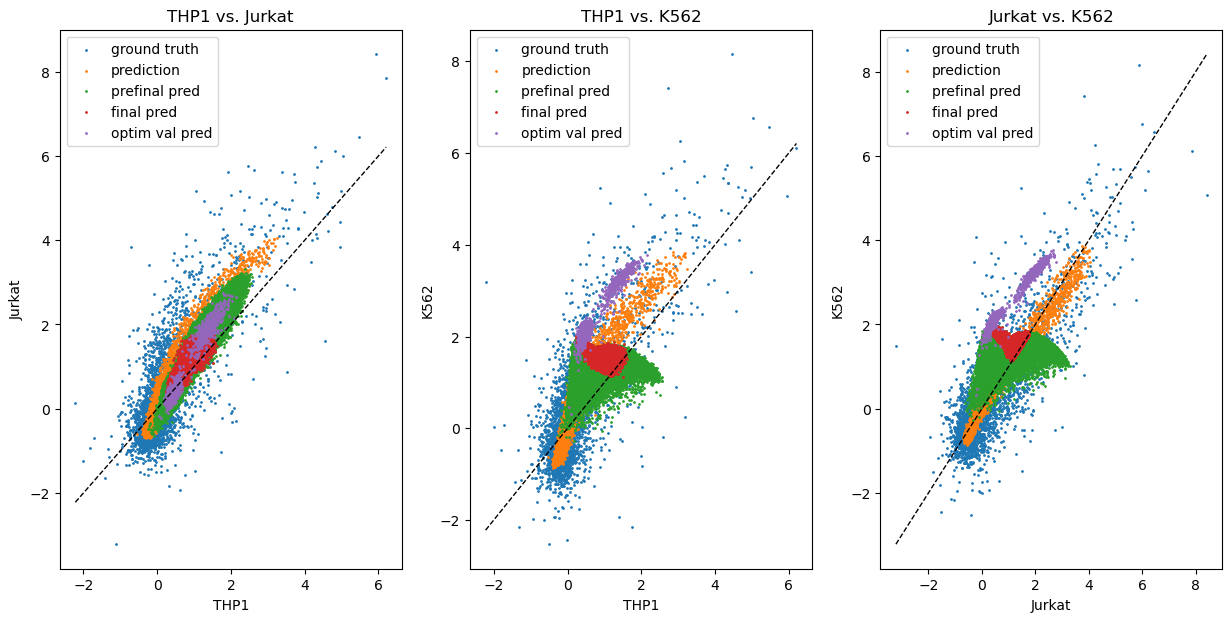

In [6]:
cells = ["THP1", "Jurkat", "K562"]
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
count = 0
for i, k in enumerate(cells):
    for j, k2 in enumerate(cells):
        if i >= j:
            continue
        axes[count].scatter(dataset_y[k], dataset_y[k2], s=1, label="ground truth")
        axes[count].scatter(dataset_pred[k], dataset_pred[k2], s=1, label="prediction")
        axes[count].scatter(prefinal_pred[k], prefinal_pred[k2], s=1, label="prefinal pred")
        axes[count].scatter(final_pred[:, i], final_pred[:, j], s=1, label="final pred")
        axes[count].scatter(optim_val_pred[k], optim_val_pred[k2], s=1, label="optim val pred")

        # draw x=y line
        axes[count].plot(
            [dataset_y[k].min(), dataset_y[k].max()],
            [dataset_y[k].min(), dataset_y[k].max()],
            'k--',
            lw=1
        )

        axes[count].set_xlabel(k)
        axes[count].set_ylabel(k2)
        axes[count].legend()
        axes[count].set_title(k + ' vs. ' + k2)
        count += 1

plt.show()